In [1]:
import numpy as np
from numpy import sin, cos, tan, exp, log, pi, sqrt, abs
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

In [7]:
'''define the spatial extent of the 1D image'''
nPoints = 2**18 #should be a power of 2 for a fast fourier transform
xlength = 100000 #we will work in units of micrometers - 100,000 μm = 100
mm = 10 #cm
wavelength = 0.5 #wavelength also in μm -> 500 nm
xvals = np.linspace(-xlength/2, xlength/2, nPoints, False) #False indicates not to include +xlength/2 in array

'''set up the frequency-domain variables (momentum) p = hbar k'''
shortestSpatialPeriod = 2.*xlength/nPoints
highestSpatialFrequency = 2*pi/shortestSpatialPeriod

'''calculate the transverse momentum kx'''
kx = np.linspace(-highestSpatialFrequency, highestSpatialFrequency,
nPoints, False)
kx = np.fft.ifftshift(kx) #shifts frequencies to match output of FFT.
k = 2*pi/wavelength

'''component of photon momentum in the forward direction'''
kz = np.zeros([nPoints], dtype=float)

'''create a mask for allowed regions of transverse momentum (kx < k)'''
kmask = np.abs(kx) < k #creates a boolean array that is true whenever kx < k and false otherwise
kz[kmask] = sqrt(k**2-kx[kmask]**2) #only calculate kz when kmask is true

'''define the spatial extent of the 1D image'''
nPoints = 2**18 #should be a power of 2 for a fast fourier transform
xlength = 100000 #we will work in units of micrometers - 100,000 μm = 100
mm = 10 #cm
wavelength = 0.5 #wavelength also in μm -> 500 nm
xvals = np.linspace(-xlength/2, xlength/2, nPoints, False) #False indicates not to include +xlength/2 in array

'''set up the frequency-domain variables (momentum) p = hbar k'''
shortestSpatialPeriod = 2.*xlength/nPoints
highestSpatialFrequency = 2*pi/shortestSpatialPeriod

'''calculate the transverse momentum kx'''
kx = np.linspace(-highestSpatialFrequency, highestSpatialFrequency,nPoints, False)
kx = np.fft.ifftshift(kx) #shifts frequencies to match output of FFT.
k = 2*pi/wavelength

'''component of photon momentum in the forward direction'''
kz = np.zeros([nPoints], dtype=float)

'''create a mask for allowed regions of transverse momentum (kx < k)'''
kmask = np.abs(kx) < k #creates a boolean array that is true whenever kx < k and false otherwise
kz[kmask] = sqrt(k**2-kx[kmask]**2) #only calculate kz when kmask is true

In [8]:
'''define a function which will propagate an electric field "image" a distance z0 in a direction perpendicular to the image'''
def propEfield(eField, z0) :
    
    '''eField is a (potentially) complex array for electric field "image" #z0 is the distance to propagate the image take the Fourier transform'''
    eFieldFFT = fft(eField)
    
    '''make an array to hold the result after applying phase factors'''
    propagateFFT = np.zeros([nPoints], dtype=complex)
    propagateFFT[kmask] = eFieldFFT[kmask]*exp(1j*z0*k*k/kz[kmask]) #apply phase factor to Fourier-space image
    
    '''calculate the inverse fft and return the complex e-field'''
    return ifft(propagateFFT)

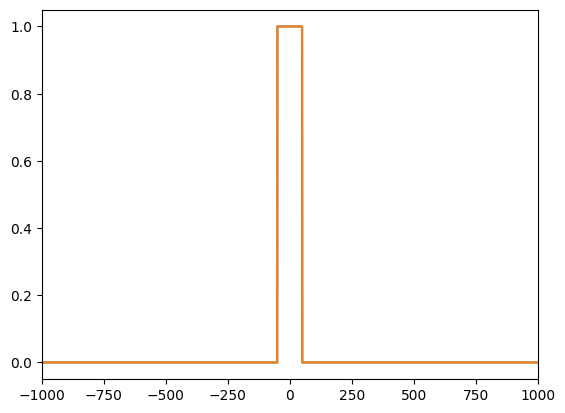

In [11]:
'''Let's define our aperture array'''
aperture = np.ones(nPoints) #completely flat E-field
slitwidth = 100 #μm
for i in range(nPoints) :
    if -slitwidth/2 < xvals[i] < slitwidth/2 :
        aperture[i] = 1.
    else :
        aperture[i] = 0.
#taking square root of irradiance gives electric field "image" to pass to function
eField = sqrt(aperture)
z0 = 100000 # μm - used for both focal length of lens and propagation distance to get real fringes
#eField = lensEfield(eField, z0) #applies a lens to e-field with a focal distance of 10 mm (in this case)
#eField = propEfield(eField, z0) #propagate the electric field forward by z0 (10 mm in this case)
screen = np.abs(eField)**2 #irradiance at the screen
plt.plot(xvals,aperture, xvals, screen)
plt.gca().set_xlim([-1000,1000])
plt.show()